<a href="https://colab.research.google.com/github/SajlaKM/XGBoost/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450130 entries, 0 to 450129
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            450130 non-null  int64  
 1   type            450130 non-null  object 
 2   amount          450130 non-null  float64
 3   nameOrig        450130 non-null  object 
 4   oldbalanceOrg   450129 non-null  float64
 5   newbalanceOrig  450129 non-null  float64
 6   nameDest        450129 non-null  object 
 7   oldbalanceDest  450129 non-null  float64
 8   newbalanceDest  450129 non-null  float64
 9   isFraud         450129 non-null  float64
 10  isFlaggedFraud  450129 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 37.8+ MB
None
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0 0 0 ... 0 0 0]
Accuracy: 0.9997111945437984
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89982
         1.0       0.91      0.45      0.61        44

    accuracy                           1.00     90026
   macro avg       0.95      0.73      0.80     90026
weighted avg       1.00      1.00      1.00     90026

Confusion Matrix:
 [[89980     2]
 [   24    20]]


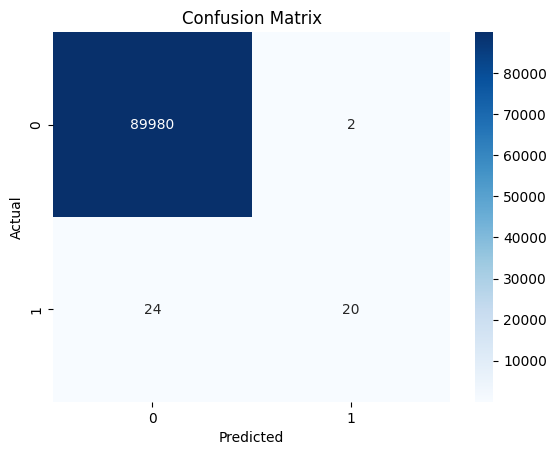

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (modify path accordingly)
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

# Display basic dataset information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())
df = df.dropna(subset=['isFraud'])


# 'isFraud' is the target variable where 1 = Fraud and 0 = Legitimate
X = df.drop(columns=['isFraud'])
y = df['isFraud']
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

scaler = StandardScaler()
X= scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train an XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()